In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn import preprocessing



df = pd.read_csv("Meteorite_Landings.csv")

# Delete NaN column
df.drop(["Unnamed: 10"], axis=1, inplace=True)

df = df.rename(columns={"name": "Nombre", "nametype": "Clase", "recclass": "Clasificación",
                         "mass (g)": "Masa (g)", "fall" : "Caída", "year": "Año", "reclat": "y", "reclong": "x"})

df

,Nombre,id,Clase,Clasificación,Masa (g),Caída,Año,y,x,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775, 6.08333)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.18333, 10.23333)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.21667, -113.0)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.88333, -99.9)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.16667, -64.95)"
...,...,...,...,...,...,...,...,...,...,...
45711,Zillah 002,31356,Valid,Eucrite,172.0,Found,1990.0,29.03700,17.01850,"(29.037, 17.0185)"
45712,Zinder,30409,Valid,"Pallasite, ungrouped",46.0,Found,1999.0,13.78333,8.96667,"(13.78333, 8.96667)"
45713,Zlin,30410,Valid,H4,3.3,Found,1939.0,49.25000,17.66667,"(49.25, 17.66667)"
45714,Zubkovsky,31357,Valid,L6,2167.0,Found,2003.0,49.78917,41.50460,"(49.78917, 41.5046)"


In [4]:
# Crear columna hemisferio
df["Hemisferio"] = df["y"] > 0

# Cambiarle los valores de True y False a Norte y Sur
df["Hemisferio"] = df["Hemisferio"].map({True: "Norte", False: "Sur"})

df.head(15)

,Nombre,id,Clase,Clasificación,Masa (g),Caída,Año,y,x,GeoLocation,Hemisferio
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775, 6.08333)",Norte
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.18333, 10.23333)",Norte
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.21667, -113.0)",Norte
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.88333, -99.9)",Norte
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.16667, -64.95)",Sur
5,Adhi Kot,379,Valid,EH4,4239.0,Fell,1919.0,32.10000,71.80000,"(32.1, 71.8)",Norte
6,Adzhi-Bogdo (stone),390,Valid,LL3-6,910.0,Fell,1949.0,44.83333,95.16667,"(44.83333, 95.16667)",Norte
7,Agen,392,Valid,H5,30000.0,Fell,1814.0,44.21667,0.61667,"(44.21667, 0.61667)",Norte
8,Aguada,398,Valid,L6,1620.0,Fell,1930.0,-31.60000,-65.23333,"(-31.6, -65.23333)",Sur
9,Aguila Blanca,417,Valid,L,1440.0,Fell,1920.0,-30.86667,-64.55000,"(-30.86667, -64.55)",Sur


In [5]:
print(df.shape)

# Eliminar filas que no tienen localización
df.dropna(subset=["y", "x"], inplace=True)
print(df.shape)

df.loc[pd.isna(df["x"])]



(45716, 11)
(38401, 11)


,Nombre,id,Clase,Clasificación,Masa (g),Caída,Año,y,x,GeoLocation,Hemisferio


In [6]:
round(df.describe(), 2)

,id,Masa (g),Año,y,x
count,38401.00,38282.00,38223.00,38401.00,38401.00
mean,25439.16,15580.98,1989.83,-39.12,61.07
std,17444.61,627320.29,26.71,46.38,80.65
min,1.00,0.00,860.00,-87.37,-165.43
25%,10879.00,6.70,1986.00,-76.71,0.00
50%,21789.00,29.34,1996.00,-71.50,35.67
75%,40042.00,189.18,2002.00,0.00,157.17
max,57458.00,60000000.00,2101.00,81.17,354.47


<Axes: xlabel='x', ylabel='y'>

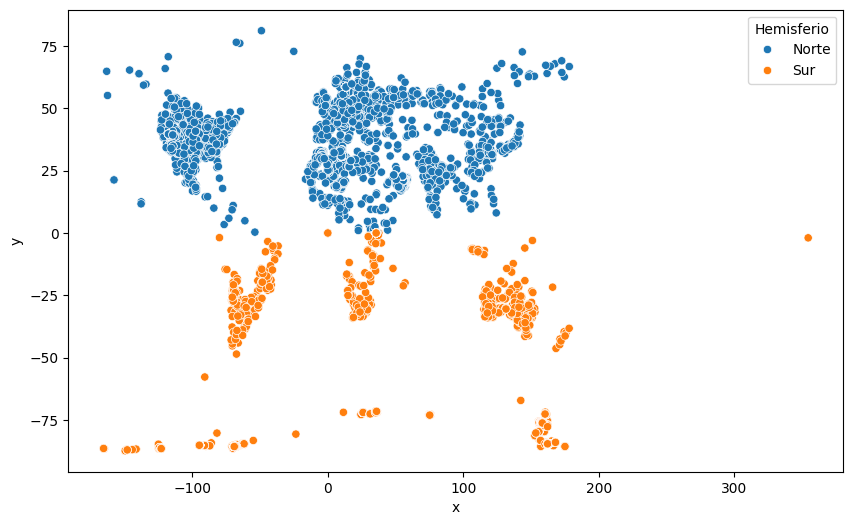

In [7]:
plt.figure(figsize=(10,6))
sns.scatterplot(data = df, x= 'x', y= 'y', hue= 'Hemisferio')



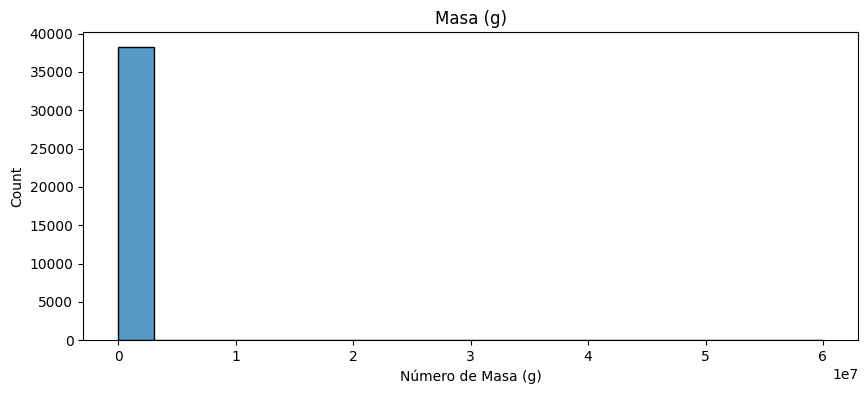

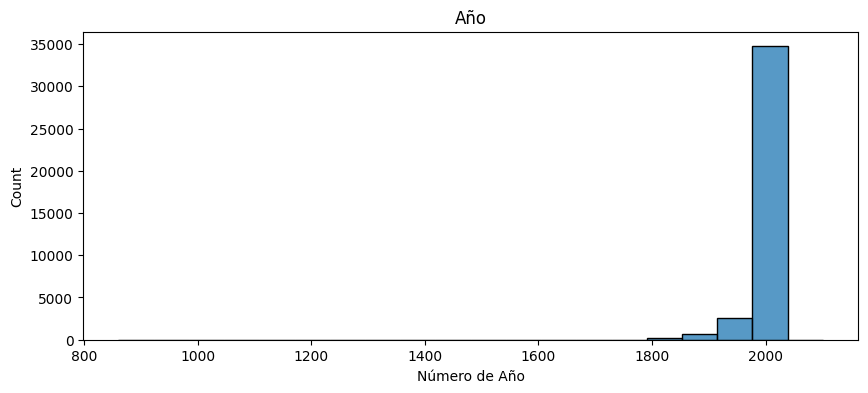

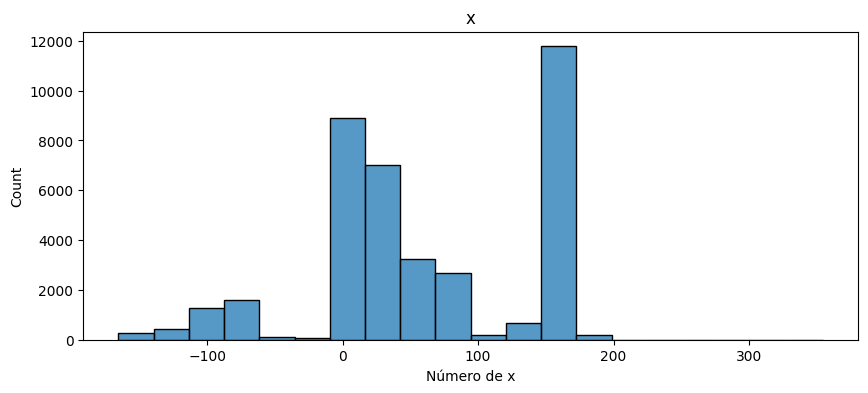

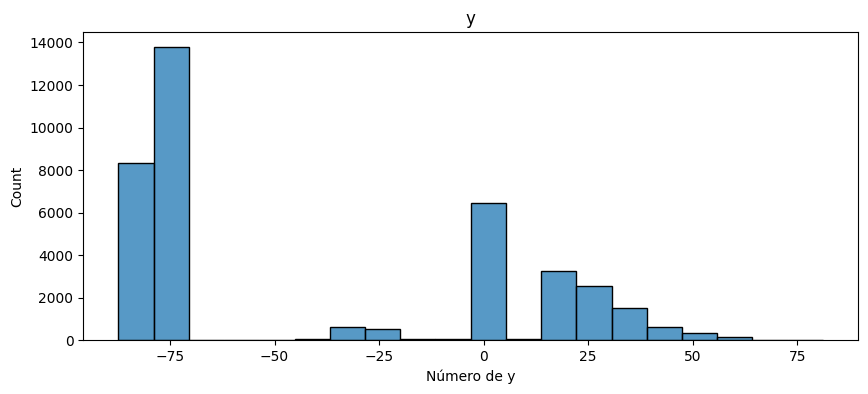

In [8]:
col_names = ["Masa (g)", "Año", "x", "y"]

for name in col_names:
    plt.figure(figsize=(10,4))
    sns.histplot(df[name], bins=20)
    plt.title(name)
    plt.xlabel(f"Número de {name}")


<Axes: xlabel='Nombre', ylabel='Masa (g)'>

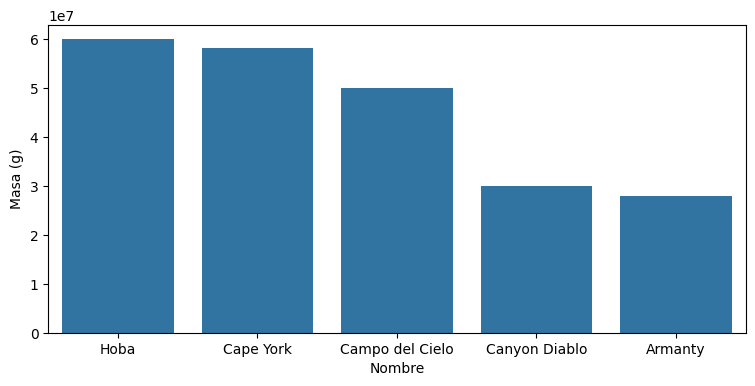

In [9]:
# Crear un df agrupado por nombre y con la columna de Masa (g)
df_mass = df.groupby('Nombre')["Masa (g)"].sum().reset_index()

df_mass = df_mass.sort_values(by="Masa (g)", ascending=False)

df_mass

plt.figure(figsize=(9, 4))
sns.barplot(x= df_mass["Nombre"].head(5), y= df_mass["Masa (g)"].head(5))

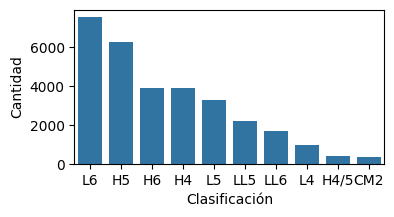

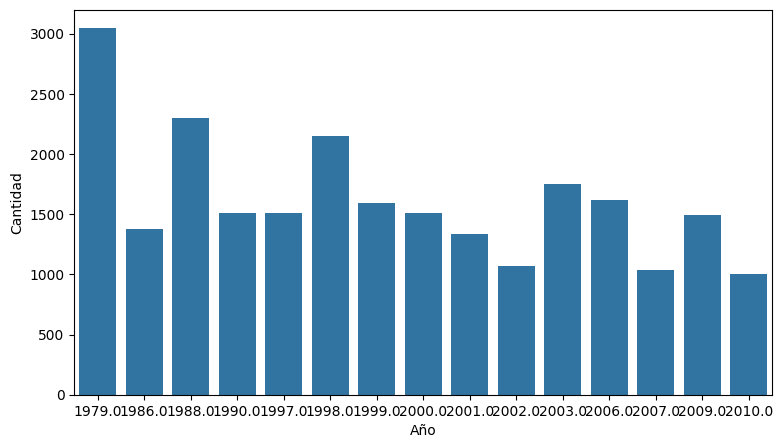

In [10]:
def create_sum(dataframe: pd.DataFrame, x_value: str, qty: int, size=(9, 5)):
    data = dataframe[x_value].value_counts().reset_index().sort_values(by="count", ascending=False)
    plt.figure(figsize=size)
    sns.barplot(x=data[x_value].head(qty), y=data["count"].head(qty))
    plt.ylabel("Cantidad")

create_sum(df, "Clasificación", 10, (4,2))
create_sum(df, "Año", 15)

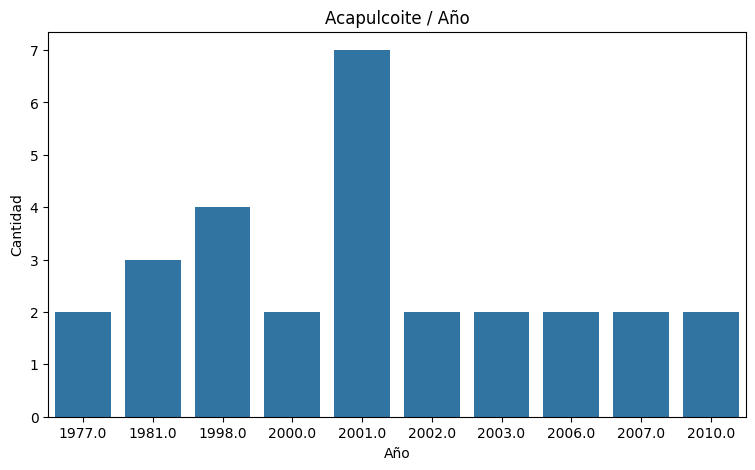

In [11]:
def create_group(dataframe: pd.DataFrame, column_name1: str, column_name2: str, by_name: str, qty: int, size=(9, 5)):
    data = dataframe.groupby([column_name1, column_name2])[column_name1].value_counts().reset_index().sort_values(by="count", ascending=False)
    df_filter = data[data[column_name1] == by_name]
    plt.figure(figsize=size)
    sns.barplot(x=df_filter[column_name2].head(qty), y=df_filter["count"].head(qty))
    plt.title(f"{by_name} / {column_name2}")
    plt.ylabel("Cantidad")


create_group(df, "Clasificación", "Año", "Acapulcoite", 10)

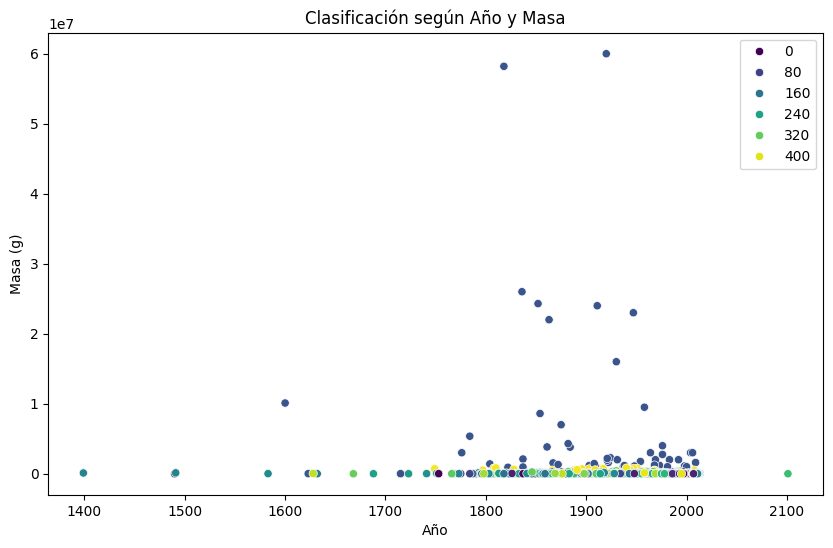

In [17]:
df_train = df.copy()
df_train.dropna(subset=['Año', 'Masa (g)', 'Clasificación'], inplace=True)

# Variables para el modelo
X = df_train[['Año', 'Masa (g)']]
y = df_train['Clasificación']

# Dividir datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

# Normalizar Año y Masa (g)
X_train_norm = preprocessing.normalize(X_train)
X_test_norm = preprocessing.normalize(X_test)

# KMeans para agrupar clasificaciones
num_clusters = len(y.unique())  # Número de clasificaciones únicas
kmeans = KMeans(n_clusters=num_clusters, random_state=0, n_init='auto')
kmeans.fit(X_train_norm)

# Visualizar resultados
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_train['Año'], y=X_train['Masa (g)'], hue=kmeans.labels_, palette='viridis')
plt.title('Clasificación según Año y Masa')
plt.xlabel('Año')
plt.ylabel('Masa (g)')
plt.show()

In [ ]:
def identify_meteorite(dataframe: pd.DataFrame, column1 = "", column2 = "", by_name1 = "", by_name2 = "", qty = 5, size = (9,5), ax = ""):
    plt.figure(figsize=size)
    data = dataframe.loc[(dataframe[column1] == by_name2) & (dataframe[column2] == by_name1)].head(qty)
    sns.scatterplot(data = data, x= 'x', y= 'y', hue= 'Hemisferio', ax=ax)
    plt.title(f"Ubicación de: {by_name2} / {by_name1}")


df.loc[(df["Año"] == 1980) & (df["Clase"] == "Valid")]

,Nombre,id,Clase,Clasificación,Masa (g),Caída,Año,y,x,GeoLocation,Hemisferio
347,Guangrao,11437,Valid,L6,1900.00,Fell,1980.0,37.10,118.40000,"(37.1, 118.4)",Norte
436,Kaidun,12228,Valid,CR2,2000.00,Fell,1980.0,15.00,48.30000,"(15.0, 48.3)",Norte
558,Lunan,14754,Valid,H6,2520.00,Fell,1980.0,24.80,103.30000,"(24.8, 103.3)",Norte
618,Mianchi,16631,Valid,H5,1100.00,Fell,1980.0,34.80,111.70000,"(34.8, 111.7)",Norte
853,Richland Springs,22602,Valid,OC,1900.00,Fell,1980.0,31.25,-99.03333,"(31.25, -99.03333)",Norte
...,...,...,...,...,...,...,...,...,...,...,...
42351,Yamato 8010,29057,Valid,L6,109.32,Found,1980.0,-71.50,35.66667,"(-71.5, 35.66667)",Sur
42352,Yamato 8011,29058,Valid,L6,571.16,Found,1980.0,-71.50,35.66667,"(-71.5, 35.66667)",Sur
42353,Yamato 8012,29059,Valid,H4,12.15,Found,1980.0,-71.50,35.66667,"(-71.5, 35.66667)",Sur
42354,Yamato 8013,29060,Valid,H4,12.46,Found,1980.0,-71.50,35.66667,"(-71.5, 35.66667)",Sur


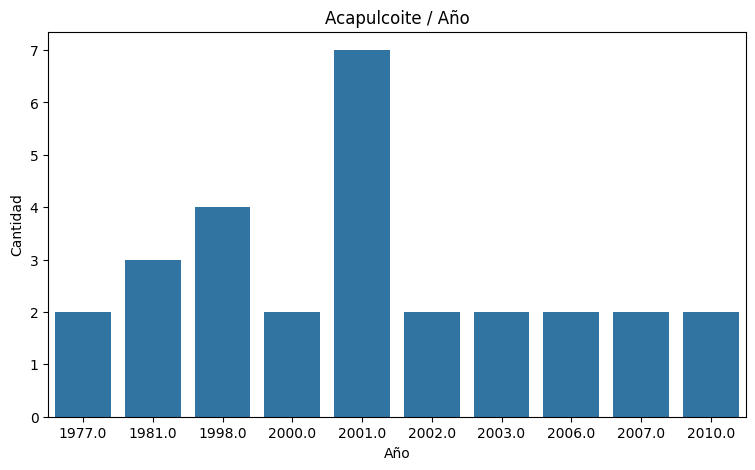

In [14]:
def build_bar_by_group(dataframe: pd.DataFrame, column_name1: str, column_name2: str, by_name: str, qty: int, size = (9,5), ax=""):
    data = dataframe.groupby([column_name1, column_name2])[column_name1].value_counts().reset_index().sort_values(by="count", ascending=False)
    df_filter = data[data[column_name2] == by_name]
    create_bar(df_filter, column_name1, by_name, qty, size)


def create_bar(dataframe: pd.DataFrame, column_name: str, by_name: str, qty: int, size=(9, 5), ax=""):
    plt.figure(figsize=size)
    sns.barplot(x=dataframe[column_name].head(qty), y=dataframe["count"].head(qty))
    plt.title(f"{by_name} / {column_name}")
    plt.ylabel("Cantidad")


build_bar_by_group(df, "Año", "Clasificación", "Acapulcoite", 10)